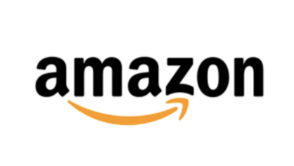

# **Impact of Discounts on Amazon Sales & Customer Analysis**

## **Background**
Amazon is one of the largest e-commerce platforms, offering a wide range of products with frequent discounts and promotions. However, despite providing significant discounts across various categories, data suggests that **higher discounts do not always result in better customer satisfaction**. Some products with bigger discounts still receive **lower ratings**, which raises important questions about:
- **Customer perception** of discounted products  
- **Product quality concerns** at higher discount rates  
- **Purchasing behavior** and its relationship with discount strategies  

Additionally, Amazon wants to **optimize its discount strategies** for high-ticket items (expensive products) to ensure that customers are satisfied with their purchases. The company also needs insights into:
- **Which product categories benefit the most from discounts**  
- **How customer feedback can improve overall sales and shopping experiences**  

This analysis will help Amazon make **data-driven decisions** to enhance customer satisfaction and maximize revenue.


## 1. Importing data

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
amazon_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KHÓA DA/Project 1/amazon.csv')

In [84]:
amazon_df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [85]:
amazon_df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

## 2. Data preparation

**Steps to consider: **
- Data cleaning (missing values, outliers)
- Data check (data type, inconsistency)
- Data Transformation (create necessary columns for futher analysis)

**2.1. Dealing with Missing Values**

In [86]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [87]:
# Drop rows where has NaN values
amazon_data = amazon_df.dropna()

In [88]:
# Recheck data
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1463 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  user_name            1463 non-null   object
 11  review_id            1463 non-null   object
 12  review_title         1463 non-null   object
 13  review_content       1463 non-null   object
 14  img_link             1463 non-null   object
 15  product_link         1463 non-null   object
dtypes: object(1

**2.2. Drop irrelevant columns and duplicated rows**

In [89]:
# Drop columns
amazon_data = amazon_data.drop(['img_link', 'product_link', 'user_id', 'review_id', 'product_id'], axis=1)

amazon_data

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_name,review_title,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."
...,...,...,...,...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p..."
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri..."
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s..."
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...


In [90]:
amazon_data = amazon_data.drop_duplicates(keep='first')

**2.3. Change type of data**

In [91]:
amazon_data = amazon_data.copy()

amazon_data['discount_percentage'] = pd.to_numeric(amazon_data['discount_percentage'].astype(str).str.rstrip('%'), errors='coerce')

amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')

amazon_data['actual_price'] = pd.to_numeric(amazon_data['actual_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False), errors='coerce')

amazon_data['discounted_price'] = pd.to_numeric(amazon_data['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False), errors='coerce')


**2.4. Seperate categories**

In [92]:
amazon_data = amazon_data.copy()
amazon_data[['category_1', 'category_2', 'category_3', 'category_4', 'category_5', 'category_6', 'category_7']] = (amazon_data['category'].str.split('|', expand=True))


In [93]:
amazon_data

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_name,review_title,review_content,category_1,category_2,category_3,category_4,category_5,category_6,category_7
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,"43,994","Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59,4.0,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25,4.1,"4,118","230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28,3.6,468,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26,4.0,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","Fan Speed is slow,Good quality,Good product,go..

## 3. Data analysis

## **Key Aspects to Consider:**
* Overall Discount Trends: Evaluate the average discount percentage across all products.
* Correlation Between Ratings and Discounts: Analyze how product ratings change with varying discount levels.
* Discount Distribution by Category: Examine how discounts are distributed across different product categories.
* High-Value Products After Discounts: Identify the most expensive items based on their final prices after discounts.
* Customer Satisfaction Analysis: Assess overall customer ratings and satisfaction levels in relation to discounts.

And other relevant factors that may impact sales, customer perception, and purchasing behavior.

You are encouraged to further the analysis as much as you can)

## **Note**
*A sample dashboard is provided for reference, but you are encouraged to develop your own approach based on the available data and insights you uncover!*  


## **The average discount percentage**

In [94]:
# Calculate the average discount percentage
average_discount = amazon_data['discount_percentage'].mean()

print(f"The average discount percentage is: {average_discount:.2f}%")

The average discount percentage is: 47.21%


## **The heatmap of the dataset**

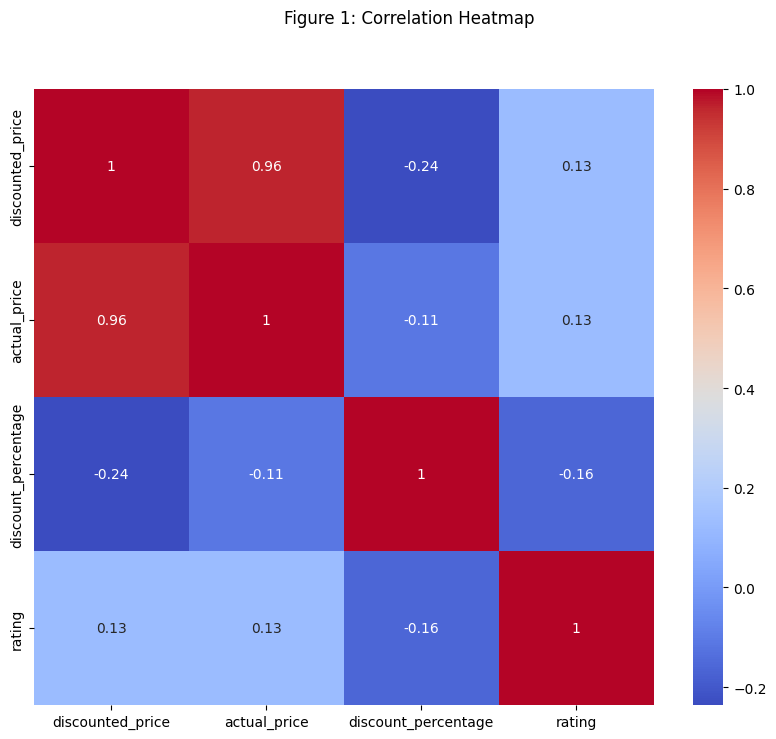

In [100]:
# Calculate the correlation matrix, excluding non-numeric columns
correlation_matrix = amazon_data.select_dtypes(include=['number']).corr()

# Create the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.suptitle("Figure 1: Correlation Heatmap")
plt.show()

**Correlation between Discount Percentage and Rating**

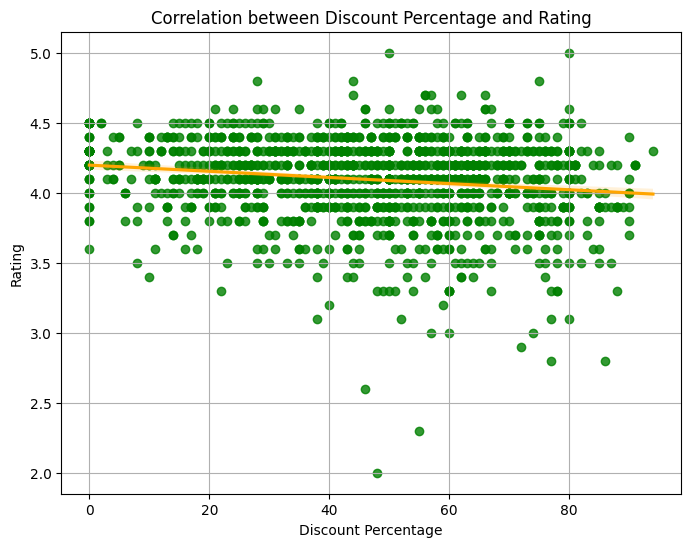

In [17]:
plt.figure(figsize=(8, 6))
sns.regplot(x=amazon_data['discount_percentage'],
            y=amazon_data['rating'],
            scatter_kws={'color': 'green'},
            line_kws={'color': 'orange'})

plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.title('Correlation between Discount Percentage and Rating')
plt.grid(True)
plt.show()

## **The Average Rating for Group of Discount Percentage**

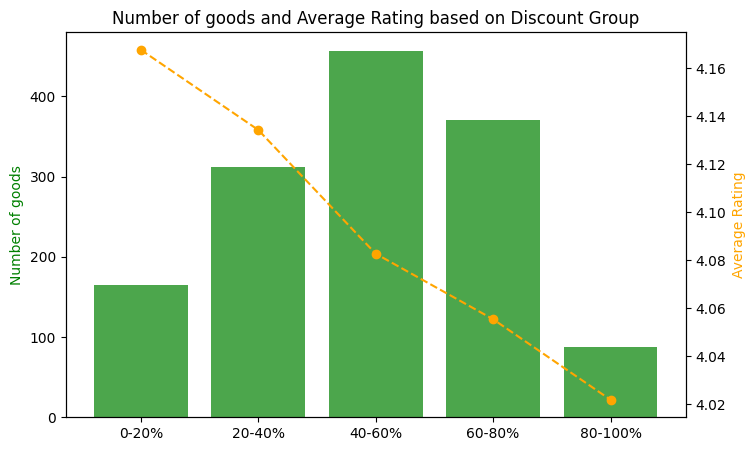

In [18]:
# Divide discount percentage in groups
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
amazon_data['discount_group'] = pd.cut(amazon_data['discount_percentage'], bins=bins, labels=labels, right=False)

# Calculate number of discount group and average rating based on discount group
discount_counts = amazon_data['discount_group'].value_counts().sort_index()
average_ratings = amazon_data.groupby('discount_group', observed=False)['rating'].mean()

# Draw bar chart
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar chart: Discount group count
ax1.bar(discount_counts.index, discount_counts, color='green', alpha=0.7, label='Số sản phẩm')
ax1.set_ylabel('Number of goods', color='green')

# Line chart: Average rating
ax2 = ax1.twinx()
ax2.plot(average_ratings.index, average_ratings, color='orange', marker='o', linestyle='dashed')
ax2.set_ylabel('Average Rating', color='orange')

plt.title('Number of goods and Average Rating based on Discount Group')
plt.show()

## **The Average of Rating Count based on Discount Group**

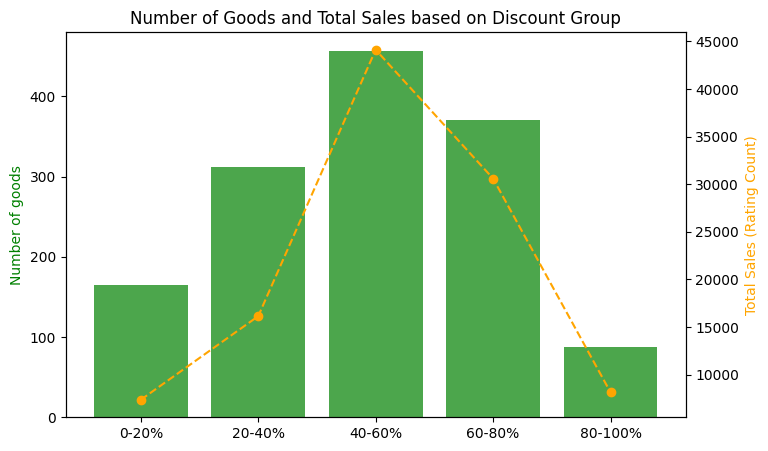

In [19]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
amazon_data['discount_group'] = pd.cut(amazon_data['discount_percentage'], bins=bins, labels=labels, right=False)

# Change rating_count type
amazon_data['rating_count'] = pd.to_numeric(amazon_data['rating_count'], errors='coerce')

# Count number of categories in each discount group
discount_counts = amazon_data['discount_group'].value_counts().sort_index()

# Count sales volume in each discount group
total_sales = amazon_data.groupby('discount_group', observed=False)['rating_count'].sum()

# Draw bar chart
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.bar(discount_counts.index, discount_counts, color='green', alpha=0.7)
ax1.set_ylabel('Number of goods', color='green')

ax2 = ax1.twinx()
ax2.plot(total_sales.index, total_sales, color='orange', marker='o', linestyle='dashed', label='Total Sales')
ax2.set_ylabel('Total Sales (Rating Count)', color='orange')

plt.title('Number of Goods and Total Sales based on Discount Group')
plt.show()


## **The Average Discount Percentage and Rating of Each Category**

<ipython-input-20-bd2a0e6f9fba>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(categories, rotation=30, ha='right')


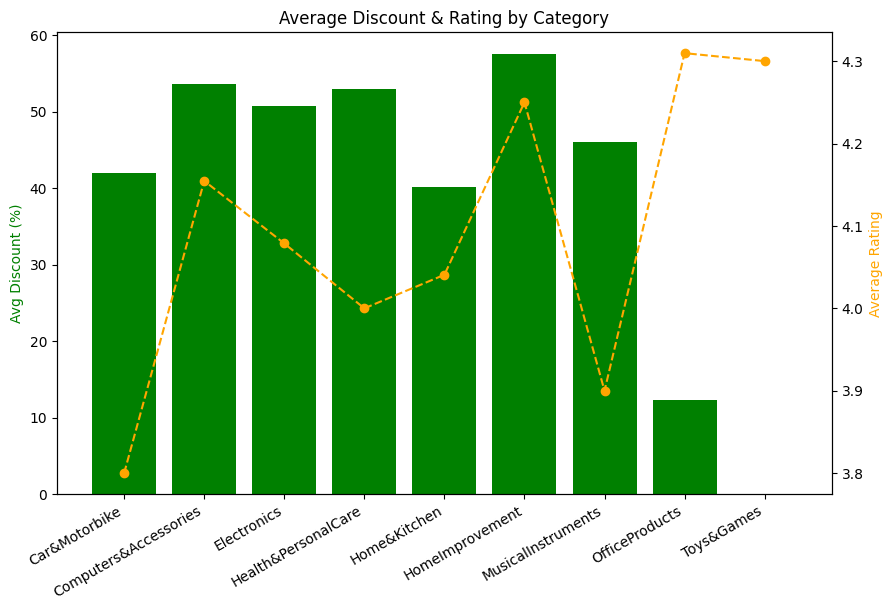

In [20]:
# Calculate average values of discount percentage and rating for category 1
category_stats = amazon_data.groupby('category_1').agg({'discount_percentage': 'mean', 'rating': 'mean'})

categories = category_stats.index.astype(str)

# Start to draw charts
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart cho discount_percentage
ax1.bar(categories, category_stats['discount_percentage'], color='green')
ax1.set_ylabel('Avg Discount (%)', color='green')

# Line chart cho rating
ax2 = ax1.twinx()
ax2.plot(categories, category_stats['rating'], color='orange', marker='o', linestyle='dashed')
ax2.set_ylabel('Average Rating', color='orange')

# Rotate x axis
ax1.set_xticklabels(categories, rotation=30, ha='right')

plt.title('Average Discount & Rating by Category')
plt.show()


## **The Average Discount Percentage and Sale Volumes of Each Category**

<ipython-input-21-94b9db7bb695>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(categories, rotation=30, ha='right')


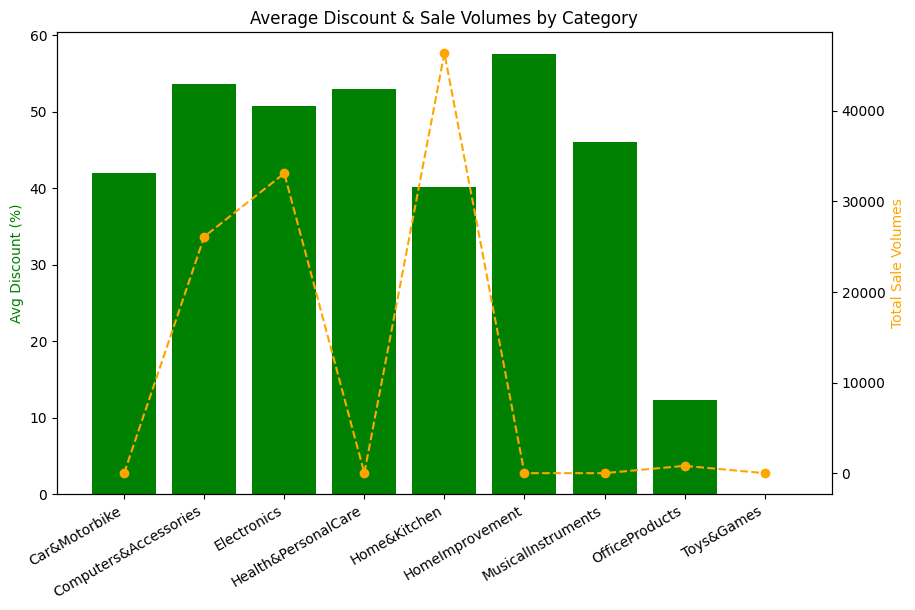

In [21]:
# Calculate average values of discount percentage and rating for category 1
category_stats = amazon_data.groupby('category_1').agg({'discount_percentage': 'mean', 'rating_count': 'sum'})

categories = category_stats.index.astype(str)

# Start to draw charts
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart cho discount_percentage
ax1.bar(categories, category_stats['discount_percentage'], color='green')
ax1.set_ylabel('Avg Discount (%)', color='green')

# Line chart cho rating
ax2 = ax1.twinx()
ax2.plot(categories, category_stats['rating_count'], color='orange', marker='o', linestyle='dashed')
ax2.set_ylabel('Total Sale Volumes', color='orange')

# Rotate x axis
ax1.set_xticklabels(categories, rotation=30, ha='right')

plt.title('Average Discount & Sale Volumes by Category')
plt.show()

## **Product Having High Rating, High Sales, High Discount Volume**

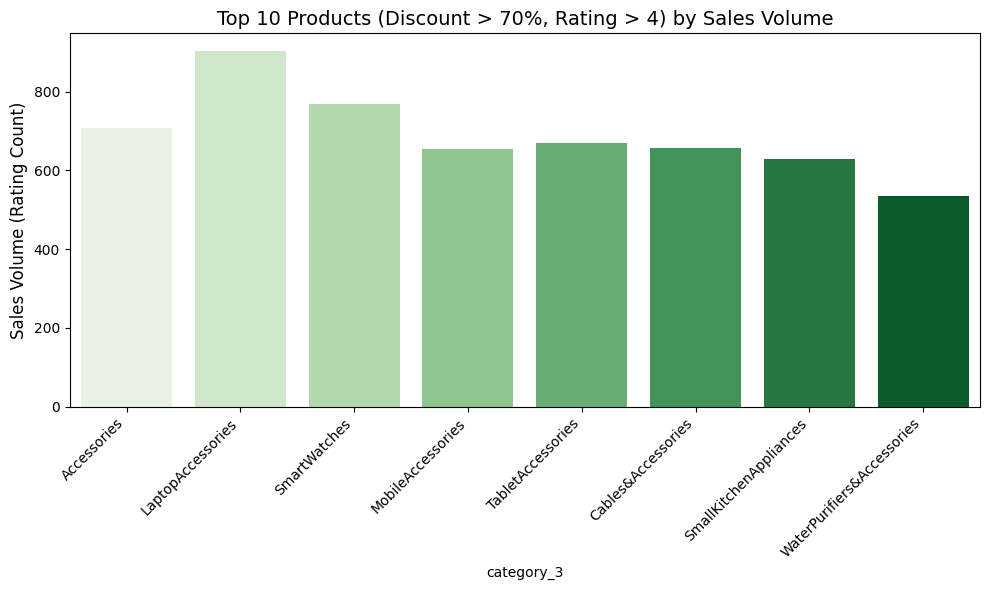

In [22]:
high_rating_high_volume = amazon_data[(amazon_data['discount_percentage'] > 70) & (amazon_data['rating'] > 4)]

top_10_filtered_df = high_rating_high_volume.sort_values(by='rating_count', ascending=False).head(10)

# bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='category_3', y='rating_count', data=top_10_filtered_df, palette='Greens', errorbar=None,  hue='category_3',  legend=False)
plt.ylabel('Sales Volume (Rating Count)', fontsize=12)
plt.title('Top 10 Products (Discount > 70%, Rating > 4) by Sales Volume', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## **Product Having Low Discount Percentage, High Rating, and High Sales Volume**

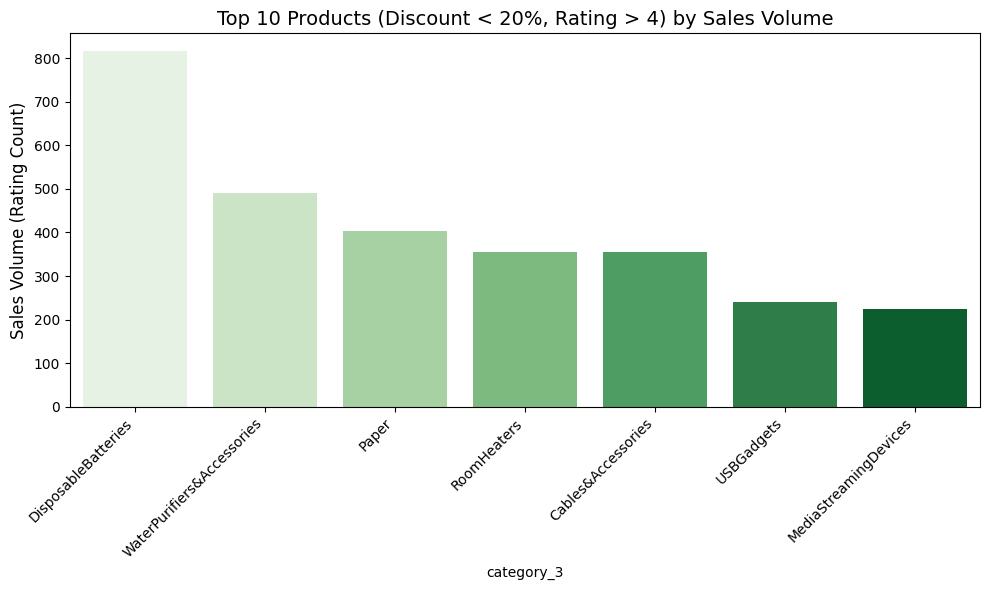

In [23]:
high_rating_high_volume_1 = amazon_data[(amazon_data['discount_percentage'] < 20) & (amazon_data['rating'] > 4)]

# Sắp xếp theo rating_count từ cao xuống thấp và lấy 10 sản phẩm đầu tiên
top_10_filtered_df = high_rating_high_volume_1.sort_values(by='rating_count', ascending=False).head(10)

# Vẽ biểu đồ bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='category_3', y='rating_count', data=top_10_filtered_df, palette='Greens', errorbar=None,  hue='category_3',  legend=False)
plt.ylabel('Sales Volume (Rating Count)', fontsize=12)
plt.title('Top 10 Products (Discount < 20%, Rating > 4) by Sales Volume', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## **Terrible Aspects of Products Having Low Rating**

In [51]:
# Filter out category having rating < 4
low_rating_products = amazon_data[amazon_data['rating'] < 4]

# Count the rating of each category
category_low_rating_counts = low_rating_products['category_1'].value_counts()

# Take out category has the highest count of low rating
most_low_rating_category = category_low_rating_counts.idxmax()

print(f"Category có nhiều sản phẩm rating < 3 nhất: {most_low_rating_category}")

Category có nhiều sản phẩm rating < 3 nhất: Home&Kitchen


In [52]:
low_rating_reviews = low_rating_products[low_rating_products['category_1'] == 'Home&Kitchen']

In [61]:
from nltk.stem import WordNetLemmatizer
import re
import nltk

# Download WordNet data
nltk.download('wordnet')

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Assuming your DataFrame is df1 and has columns ['videoId', 'comment', 'author']
english_text = pd.DataFrame(low_rating_reviews['review_content'], columns=['review_content'])

# List to store cleaned text
cleaned_data = []

# Iterate over each comment in the 'comment' column
for review in english_text['review_content']:
    try:
        # Ensure the comment is a string; if not, skip or convert
        if not isinstance(review, str):
            continue

        # Removing everything except alphabets and replacing it with a space
        review = re.sub('[^A-Za-z]', ' ', review)
        # Removing URLs
        review = re.sub(r"http\S+|www\S+|https\S+", ' ', review)
        # Convert to lowercase
        review = review.lower()
        # Tokenization
        tokens = review.split()
        # Removing short words
        filtered_tokens = [w for w in tokens if len(w) > 3]
        # Apply lemmatization
        lemmatized_tokens = [lemmatizer.lemmatize(w) for w in filtered_tokens]
        # Join tokens back to string
        reivew = ' '.join(lemmatized_tokens)
    except Exception as e:
        print(f"Error processing review: {e}")
        continue
    # Save cleaned text
    cleaned_data.append(review)

# Convert cleaned data to a DataFrame if needed
cleaned_df = pd.DataFrame(cleaned_data, columns=['cleaned_review'])

# Display the cleaned data
cleaned_df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,cleaned_review
0,quality of adhesive is very good i used it to...
1,somehow amazon sucks when you want to select a...
2,good product for tight spaces and easy to rep...
3,it is really good product it is showing accura...
4,everythings good but cells die within a couple...


In [62]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

# Load the list of English stopwords
stop_words = set(stopwords.words('english'))  # Using a set for faster lookup

# List to store the cleaned comments
cleaned_review_list = []  # Initialize as a list

# Remove Stop Words
for review in cleaned_df['cleaned_review']:  # Iterate over the 'cleaned_comment' column
    if isinstance(review, str):  # Ensure the comment is a string
        each_item = []
        for t in review.split():
            if t.lower() not in stop_words:  # Filter out stopwords (case insensitive)
                each_item.append(t)
        cleaned_review = ' '.join(each_item)  # Join the cleaned words back into a single string
        cleaned_review_list.append(cleaned_review)  # Add to the list of cleaned comments

# Create a new DataFrame with the cleaned comments
cleaned_review_df = pd.DataFrame(cleaned_review_list, columns=['cleaned_comment_no_stopwords']) # Use the list

# Display the first few rows of the new DataFrame
print(cleaned_review_df.head())

                        cleaned_comment_no_stopwords
0  quality adhesive good used stick photo canvas ...
1  somehow amazon sucks want select electric kett...
2  good product tight spaces easy replace well on...
3  really good product showing accurate weight gr...
4  everythings good cells die within couple month...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
from collections import Counter

# Concatenate all cleaned comments into a single string
all_words = ' '.join(cleaned_review_list) # Use cleaned_review_list instead of cleaned_review

# Calculate word frequencies using Counter
word_counts = Counter(all_words.split()) # Split the string into words before counting

# Convert the word frequencies to a DataFrame
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Display the DataFrame
word_freq_df.head(50)

,word,frequency
13,product,445
2,good,428
144,use,201
101,water,155
40,easy,125
0,quality,112
77,one,102
183,price,85
26,nice,79
79,also,77


<ipython-input-64-300d40b6ceb2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=top_words, palette='viridis')


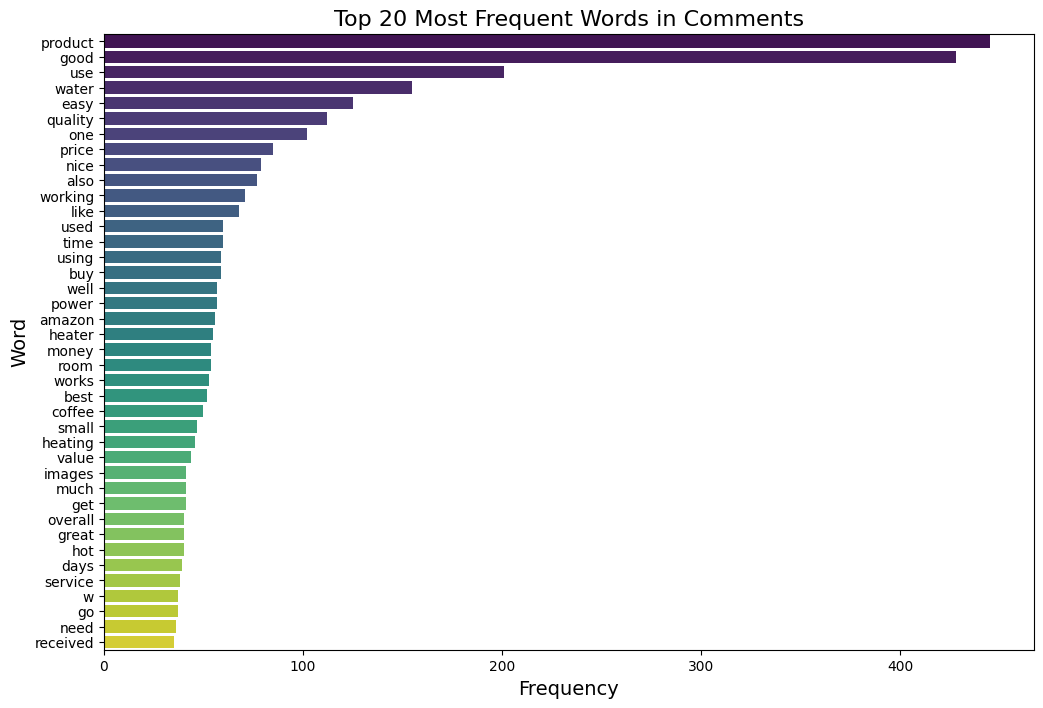

In [64]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot the top 20 most frequent words
top_words = word_freq_df.head(40)

# Create the barplot using seaborn
sns.barplot(x='frequency', y='word', data=top_words, palette='viridis')

# Add title and labels
plt.title('Top 20 Most Frequent Words in Comments', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word', fontsize=14)

# Show the plot
plt.show()

In [65]:
# Remove the words "airpods" and "thank" from the DataFrame
words_to_remove = ['one','product','use']
word_freq_df = word_freq_df[~word_freq_df['word'].isin(words_to_remove)]

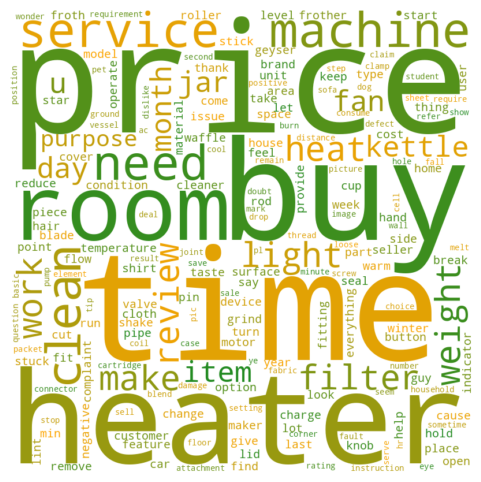

In [70]:
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap

# Combine all text in the DataFrame into a single string
all_text = ' '.join(word_freq_df['word'].tolist())

# Define a custom colormap blending green and orange
colors = ["#228B22", "#FFA500"]
custom_cmap = LinearSegmentedColormap.from_list("green_orange", colors, N=256)

# Generate the word cloud with the custom colormap
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap=custom_cmap).generate(all_text)

# Display the word cloud
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()